## Hypothesis 2:
### Is the impact of summer significant and has a positive effect in the model? During summer-time people are claimed to take more leaves and travel choosing long-haul destinations, therefore they are believed to upgrade to a higher class.

In [2]:
import pandas as pd
import re

In [21]:
data = pd.read_csv("data/chunks/chunks/chunk2.csv")

/tmp/ipykernel_7526/3161528115.py:1: DtypeWarning: Columns (22,23,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/chunks/chunks/chunk2.csv")


In [20]:
data = data[['BOOKING_DEPARTURE_TIME_UTC','UPGRADED_FLAG.y']]

In [5]:
data

,BOOKING_DEPARTURE_TIME_UTC,UPGRADED_FLAG.y
0,2007-08-14 17:45:00,N
1,2007-08-14 17:45:00,N
2,2007-08-14 17:45:00,N
3,2007-08-14 17:45:00,N
4,2007-07-04 14:55:00,N
...,...,...
499995,2007-09-14 04:00:00,N
499996,2007-09-14 04:00:00,N
499997,2007-09-14 04:00:00,N
499998,2007-09-14 04:00:00,N


In [24]:
pattern = r'2007-0[6|7|8]-\d\d \d\d:\d\d:\d\d'

filter = data['BOOKING_DEPARTURE_TIME_UTC'].str.contains(pattern)


data = data[filter==True]

In [25]:
data1 = data["BOOKING_DEPARTURE_TIME_UTC"]
data2 = data["UPGRADED_FLAG.y"]

UPGRADED_FLAG.y              N  Y
BOOKING_DEPARTURE_TIME_UTC       
2007-06-01 00:40:00         56  0
2007-06-01 01:55:00          3  0
2007-06-01 02:00:00         34  0
2007-06-01 02:05:00         56  0
2007-06-01 02:30:00         75  2
...                         .. ..
2007-08-31 21:30:00         10  0
2007-08-31 22:25:00         22  0
2007-08-31 23:05:00         31  0
2007-08-31 23:20:00          1  0
2007-08-31 23:25:00         35  1

[8891 rows x 2 columns]
stat=19396.29, p=0.0

Probably dependent


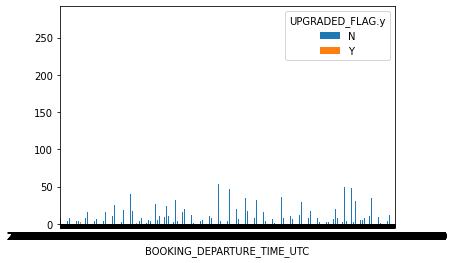

In [26]:
from scipy.stats import chi2_contingency

# A cross tabulation report is used to analyze the relationship between two variables(or more).
CrosstabResult=pd.crosstab(index=data1,columns=data2)

print(CrosstabResult)

# As you can see from the graph, the relationship between the data is zero
barplot = CrosstabResult.plot.bar(rot=0)	

# Get chi2 and probability
chi2, p,_,_ = chi2_contingency(CrosstabResult)


print('stat={0:.2f}, p={1}\n'.format(chi2, p))



if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')